In [99]:
import sys
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

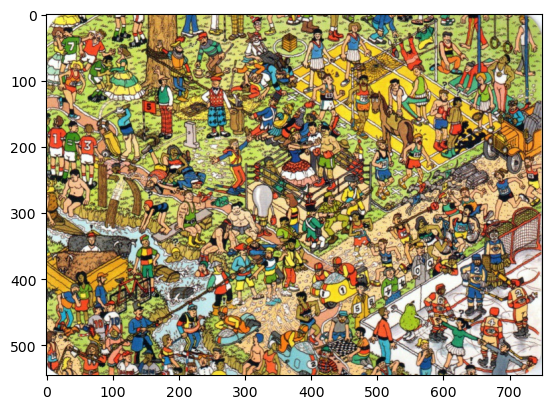

In [100]:
img = cv.imread(r'C:\image\input2.jpg')
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

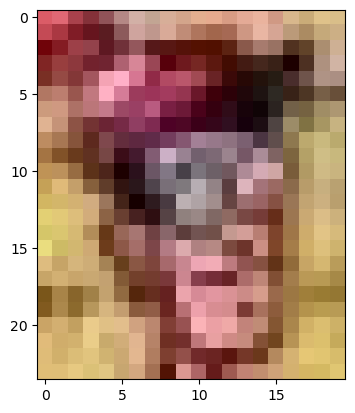

In [101]:
template = cv.imread(r'C:\image\templates\template_second.jpg')
template = template
template_rgb = cv.cvtColor(template, cv.COLOR_BGR2RGB)
plt.imshow(template_rgb)

cv.TM_CCOEFF_NORMED
 309  4  329  28


True

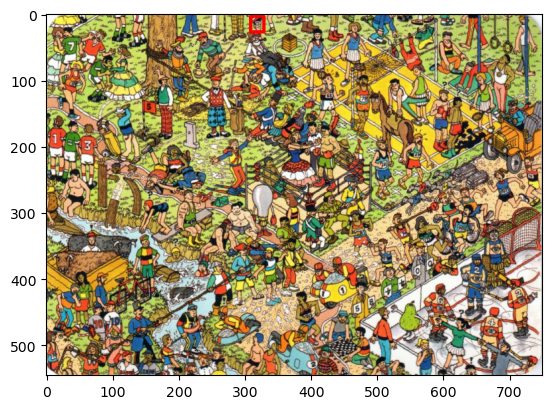

In [102]:
threshold = 0.8

img_gray = cv.cvtColor(image_rgb, cv.COLOR_RGB2GRAY)

template_gray = cv.cvtColor(template, cv.COLOR_RGB2GRAY)
w, h = template_gray.shape[::-1]



#methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
       #    'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
methods = ['cv.TM_CCOEFF_NORMED']
for meth in methods:
    image_rgb_with_detected = image_rgb
    method = eval(meth)
    res = cv.matchTemplate(img_gray, template_gray, method)

    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # Для методов TM_SQDIFF и TM_SQDIFF_NORMED берется минимум, для остальных максумум res
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
      #   if method in [cv.TM_CCORR_NORMED, cv.TM_CCOEFF_NORMED]:
        
        top_left = min_loc
    else:
        top_left = max_loc
        
    print(meth)   
    
        
    bottom_right = (top_left[0] + w, top_left[1] + h)
    print('',top_left[0],
          '',top_left[1],
          '',bottom_right[0],
          '',bottom_right[1]) 
    
    cv.rectangle(image_rgb_with_detected, top_left, bottom_right, 255, 4)
plt.imshow(image_rgb_with_detected)

img_bgr= cv.cvtColor(image_rgb_with_detected, cv.COLOR_RGB2BGR)
cv.imwrite('detected.jpg', img_bgr)
    